# House price prediction

## Predicting the price of houses in Washnington DC in USA.

### Data analysis

- Missing values.
- Temporal variables.
- Categorical variables.
- Numerical variables.
- Multicollinearity.
- data validation tests.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data_frame=pd.read_csv('data.csv.xls')
#data_frame2=pd.read_csv('output.csv.xls')

In [20]:
#data_frame=pd.concat([data_frame1,data_frame2],axis=0)

In [21]:
#data_frame.index=np.arange(0,9200)

In [22]:
data_frame.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [23]:
#let's remove date feature because there's no use of that. 
data_frame.drop(['date'],axis=1,inplace=True)

In [24]:
data_frame.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Missing values.

In [25]:
for cols in data_frame.columns:
    print(cols,' has ',data_frame[cols].isnull().sum(),' null values')

price  has  0  null values
bedrooms  has  0  null values
bathrooms  has  0  null values
sqft_living  has  0  null values
sqft_lot  has  0  null values
floors  has  0  null values
waterfront  has  0  null values
view  has  0  null values
condition  has  0  null values
sqft_above  has  0  null values
sqft_basement  has  0  null values
yr_built  has  0  null values
yr_renovated  has  0  null values
street  has  0  null values
city  has  0  null values
statezip  has  0  null values
country  has  0  null values


No feature has null values.

### Temporal variables.

In [26]:
temporal_features=[]
for cols in data_frame.columns:
    if 'yr' in cols:
        temporal_features.append(cols)

In [27]:
temporal_features

['yr_built', 'yr_renovated']

In [28]:
data_frame[temporal_features].head()

,yr_built,yr_renovated
0,1955,2005
1,1921,0
2,1966,0
3,1963,0
4,1976,1992


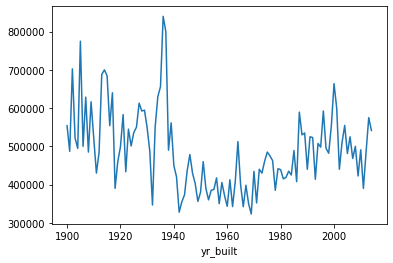

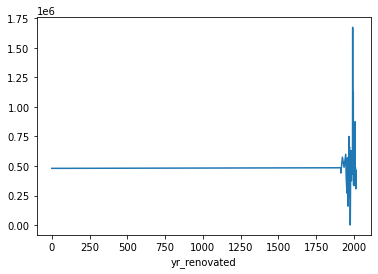

In [29]:
#finding the relationship between the temporal variables and output feature.
for cols in temporal_features:
    data_frame.groupby(cols)['price'].median().plot()
    plt.show()

In [30]:
data_frame[cols].unique()

array([2005,    0, 1992, 1994, 2010, 1988, 2009, 1969, 2000, 1979, 1989,
       2014, 1999, 2003, 1983, 1997, 1912, 1923, 1954, 2011, 2001, 2013,
       2006, 1972, 1985, 1998, 2004, 1958, 2008, 1970, 1982, 1986, 1996,
       2002, 1971, 1990, 1956, 1945, 1984, 2012, 1993, 2007, 1981, 1974,
       1963, 1968, 1995, 1934, 1953, 1966, 1955, 1987, 1960, 1978, 1980,
       1948, 1991, 1913, 1977, 1975])

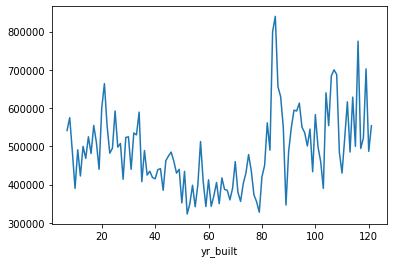

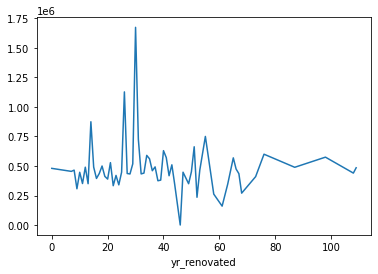

In [31]:
#lets transform the temporal features. 
for cols in temporal_features:
    data=data_frame.copy()
    data[cols]=np.where(data[cols].isin([0]),0,2021-data[cols])
    data.groupby(cols)['price'].median().plot()
    plt.show()

### Catagorical features

In [32]:
categorical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        categorical_features.append(cols)
categorical_features

['street', 'city', 'statezip', 'country']

In [33]:
#cardinality(used to check the number of categories in the feature.)

Relationship between street and price


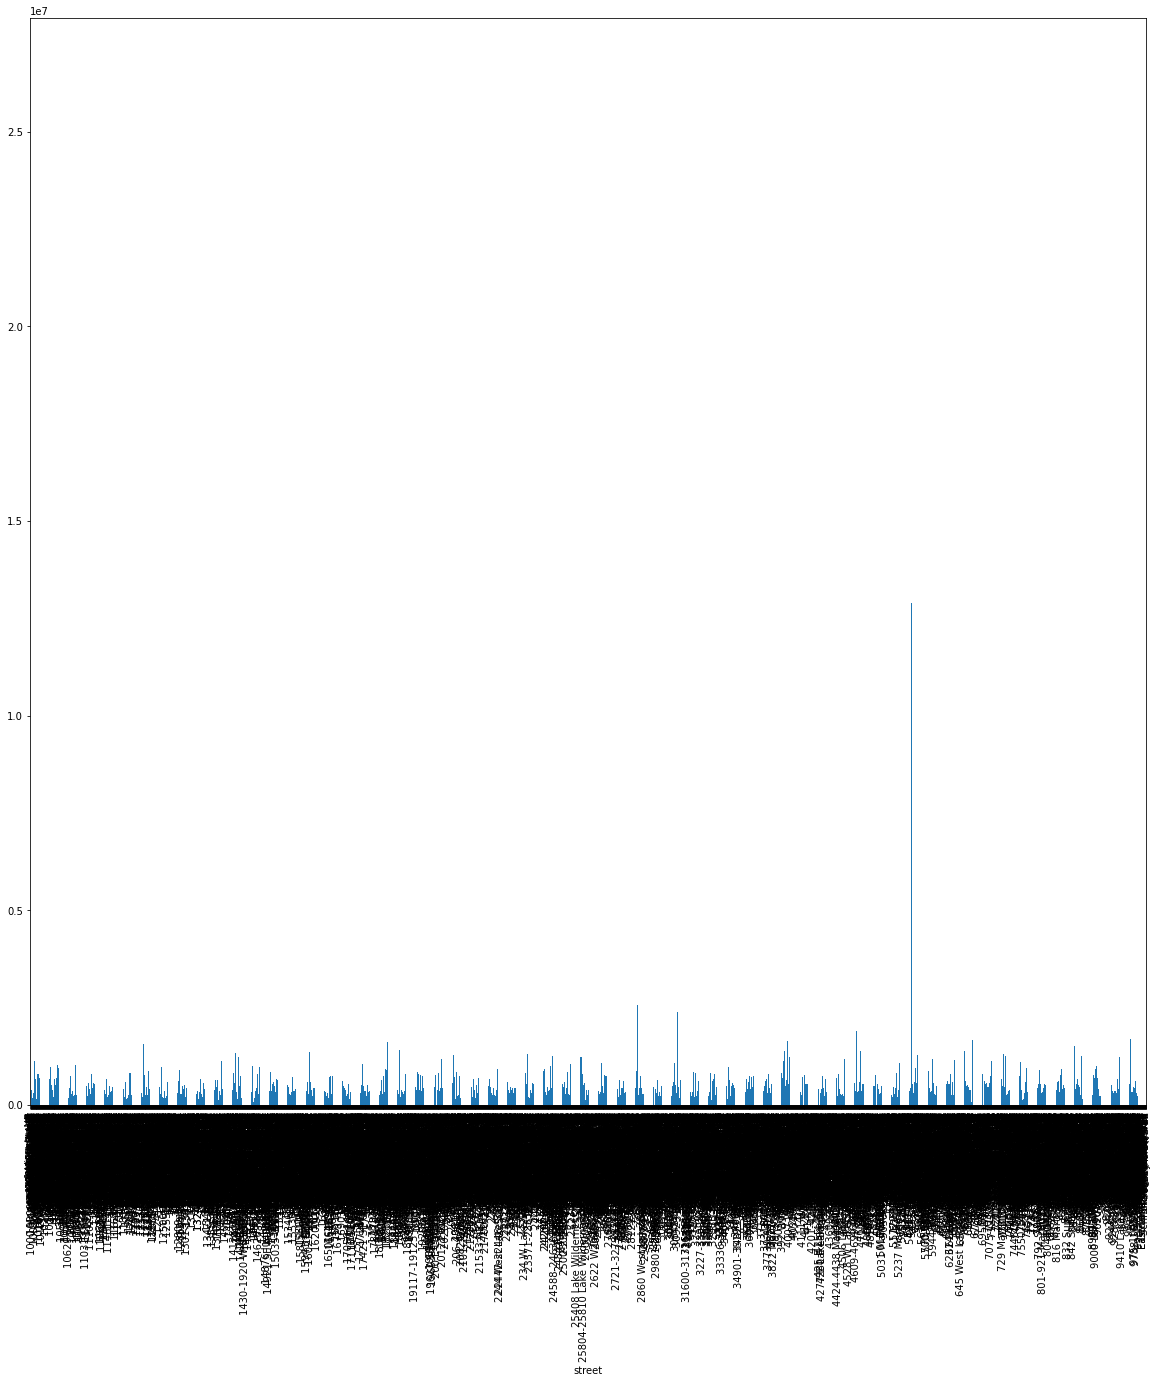

Relationship between city and price


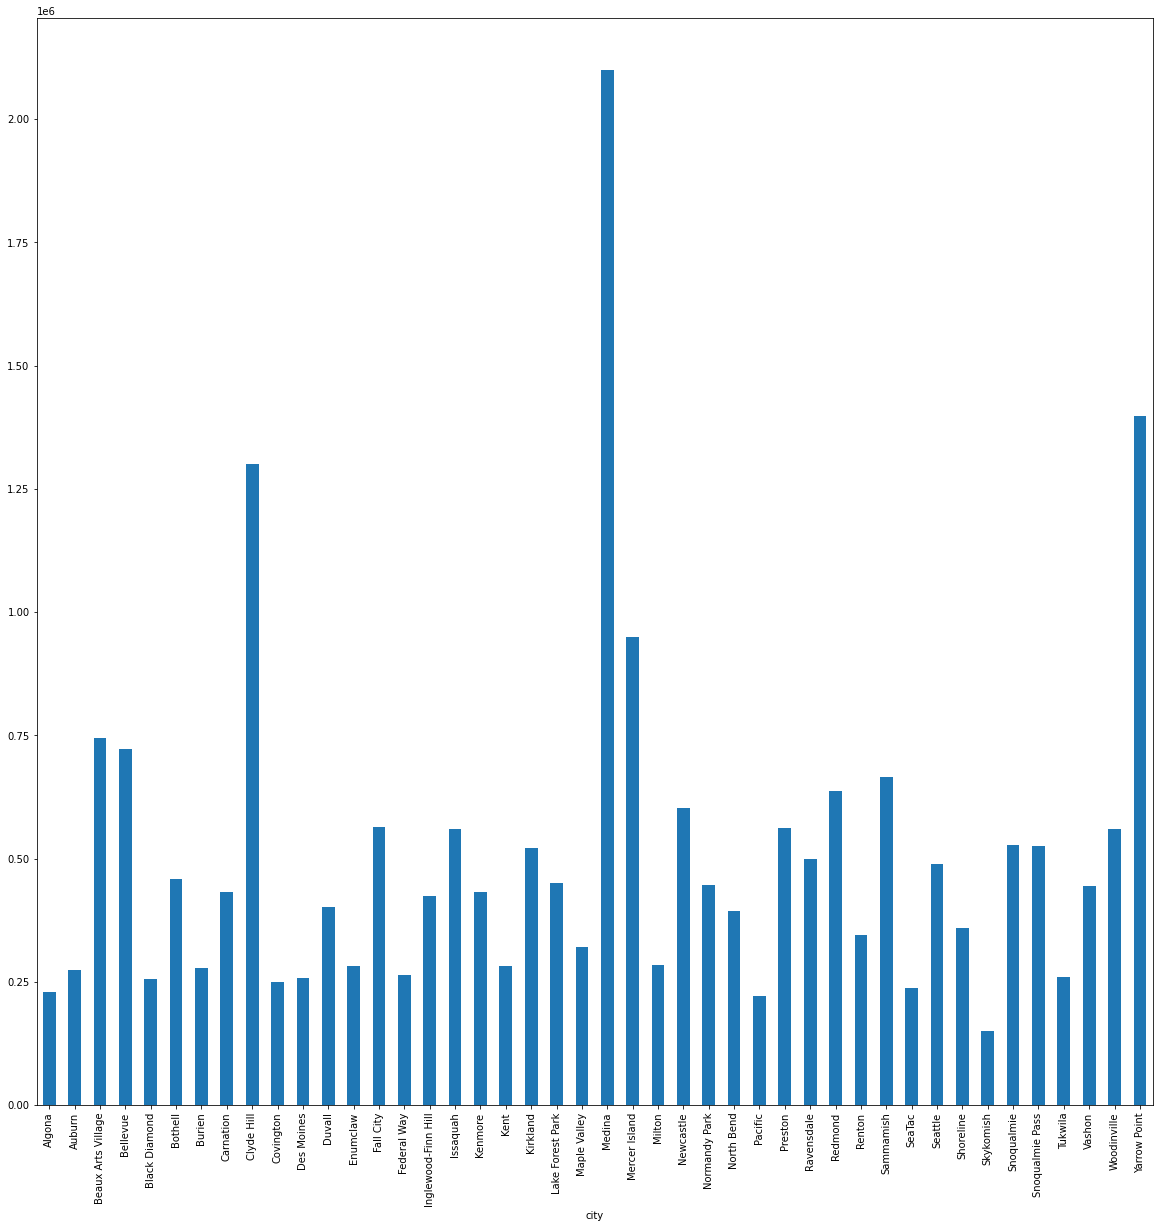

Relationship between statezip and price


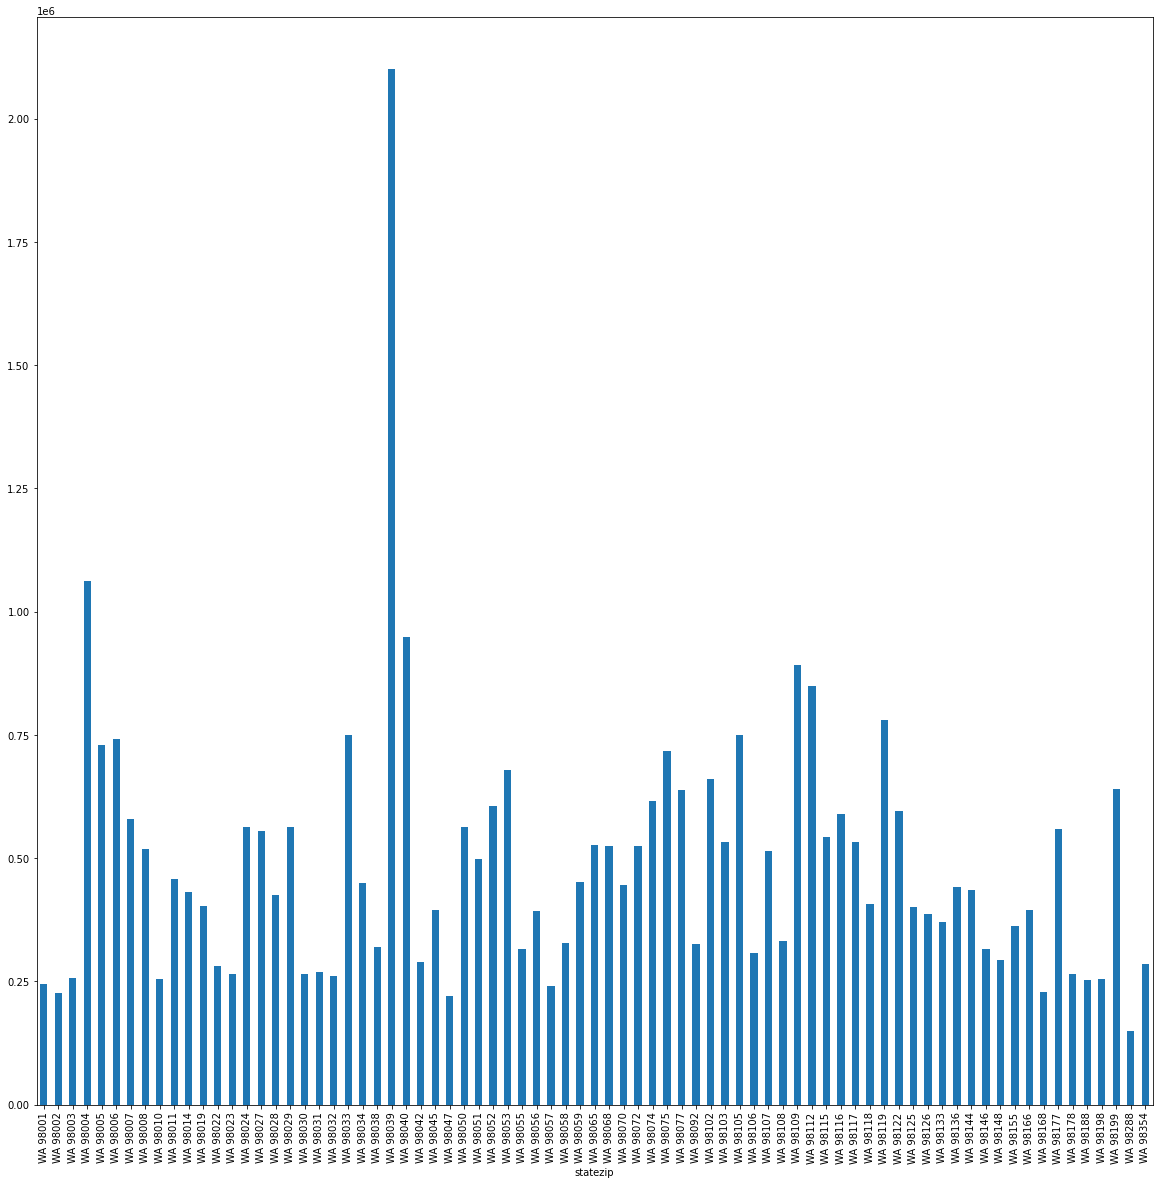

Relationship between country and price


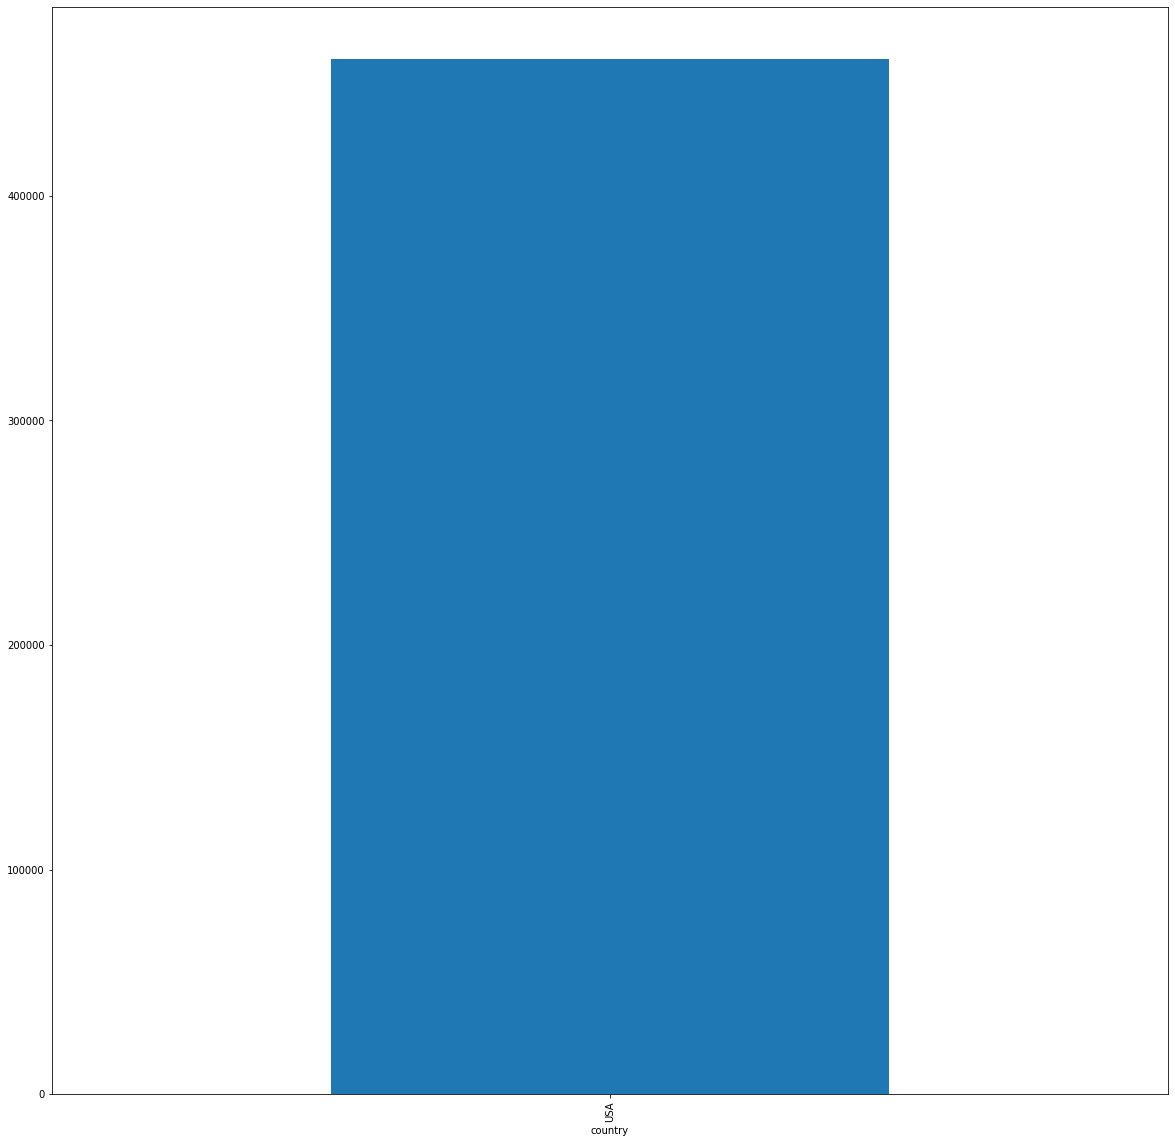

In [34]:
#finding the relationhip between the categorical features and depedent feature.
for cols in categorical_features:
    print('Relationship between {} and price'.format(cols))
    plt.figure(figsize=(20,20))
    data_frame.groupby(cols)['price'].median().plot.bar()
    plt.show()

### Numerical features.

In [35]:
#getting the numerical features.
numerical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        numerical_features.append(cols)

In [36]:
#finding the relationship between the numerical features and dependent feature.
discrete_features=[]
continuos_features=[]
for cols in numerical_features:
    if len(data_frame[cols].unique())<25:
        discrete_features.append(cols)
    else:
        continuos_features.append(cols)

In [37]:
discrete_features

['bedrooms', 'floors', 'waterfront', 'view', 'condition']

In [38]:
continuos_features

['price',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

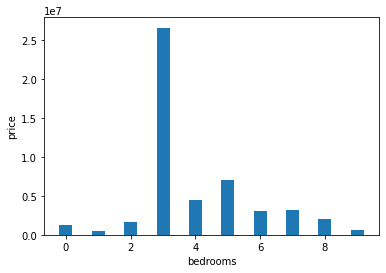

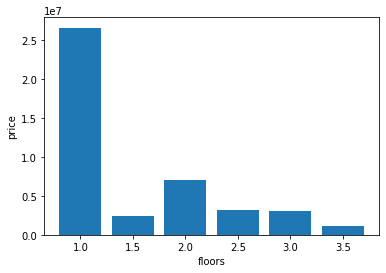

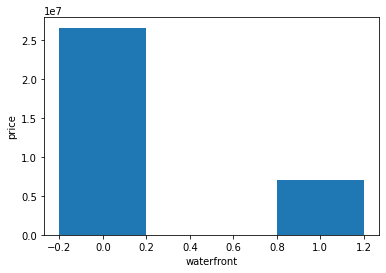

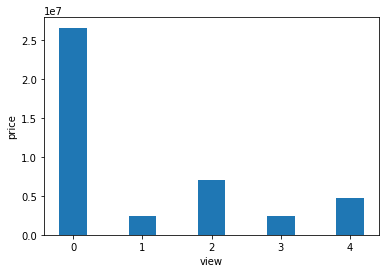

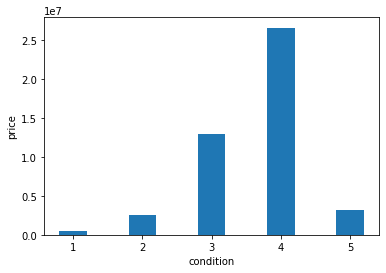

In [39]:
#relationship between discrete features and dependent feature.
for cols in discrete_features:
    plt.bar(data_frame[cols],data_frame['price'],width=0.4)
    plt.xlabel(cols)
    plt.ylabel('price')
    plt.show()

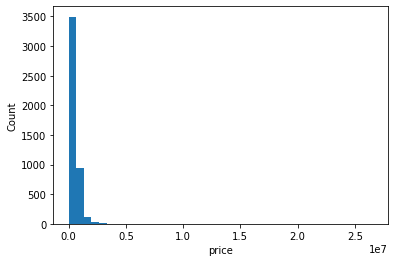

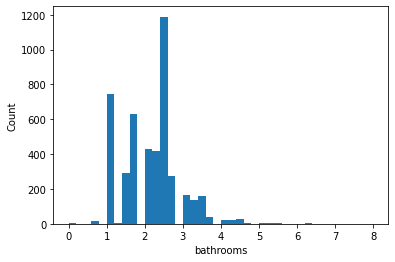

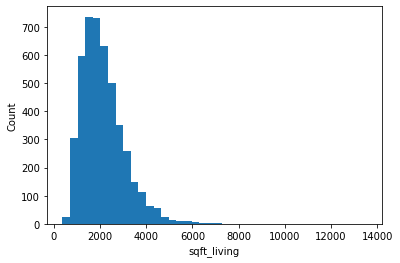

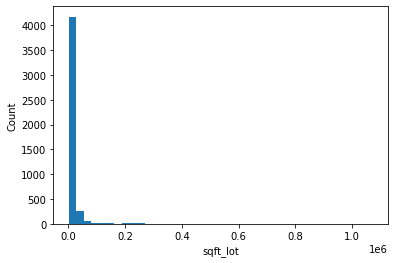

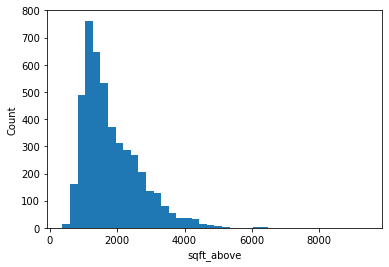

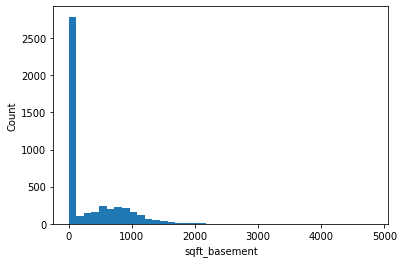

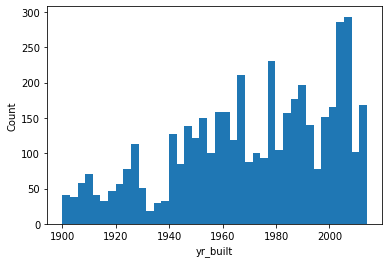

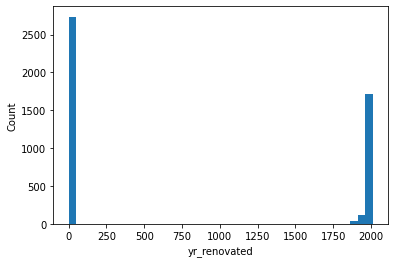

In [40]:
#finding the histograms for continous data.
for cols in continuos_features:
    plt.xlabel(cols)
    plt.ylabel('Count')
    plt.hist(data_frame[cols],bins=40)
    plt.show()

In [41]:
features_to_transform=['price','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement']
for cols in features_to_transform:
    data=data_frame.copy()
    if 0 in data[cols]:
        pass
    else:
        data[cols]=np.log(data[cols])
        data[cols].hist()
        plt.show()

Though there are no 0's in features. We don't perform any transformation techniques.

### Outliers

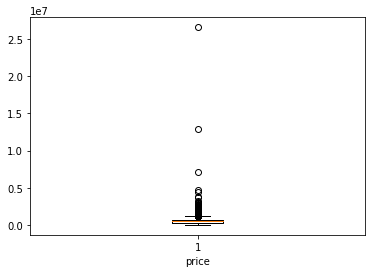

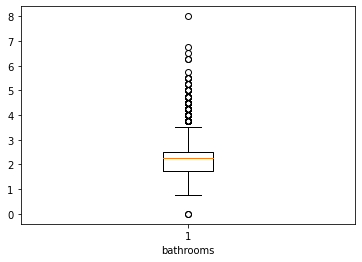

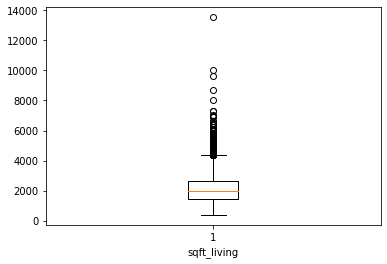

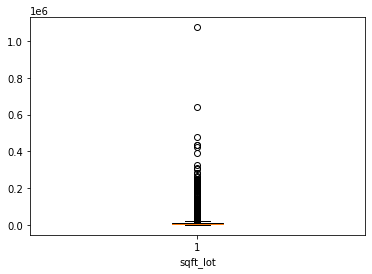

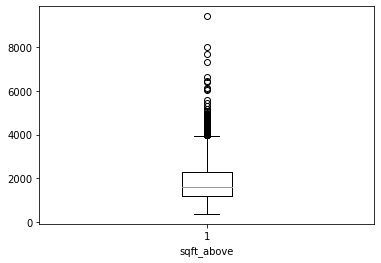

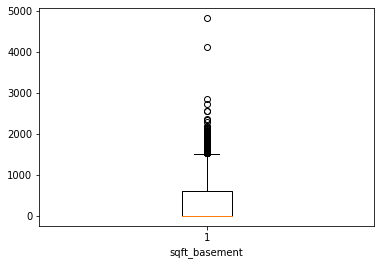

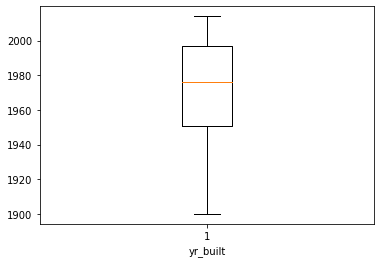

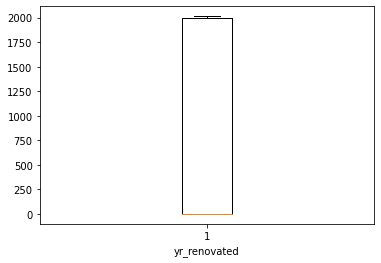

In [42]:
for cols in continuos_features:
    plt.boxplot(data_frame[cols])
    plt.xlabel(cols)
    plt.show()

In [43]:
#saving dataframe
data_frame.to_csv('modified_dataset.csv',index=False)

In [44]:
data_frame

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
